## Observations and Insights 

In [ ]:
#observations
#while Capomulin and ramicane had large variations in final tumor volume, they also had the smallest final volume during the tests
#from the random sample line graph of Capomulin drug tests, we can see that the drug didn't take effect right away, but once processed, had immediate results
#from the scatter plot of capomulin drug tests, we can see a direct coorelation between the weight of the mouse and the avg tumor volume (nearly a 1:1 coorelation)

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
full_mouse = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')

full_mouse.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice in the DataFrame.
len(full_mouse['Mouse ID'].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using-dataframe-duplicated-in-python/

dup_mice = full_mouse.loc[full_mouse.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
dup_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# https://www.w3resource.com/pandas/dataframe/dataframe-isin.php
full_mouse_clean = full_mouse[full_mouse['Mouse ID'].isin(dup_mice)==False]
full_mouse_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [5]:
# Checking the number of mice in the clean DataFrame.
len(full_mouse_clean['Mouse ID'].unique())

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean = full_mouse_clean.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
#print(mean)
median = full_mouse_clean.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
#print(median)
variance = full_mouse_clean.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
#print(variance)
std_dev = full_mouse_clean.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
#print(std_dev)
sem = full_mouse_clean.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
#print(sem)
# This method is the most straightforward, creating multiple series and putting them all together at the end.

drug_tumor_summary = pd.DataFrame({
    'Mean Tumor Volume': mean,
    'Median Tumor Volume': median,
    'Tumor Variance': variance,
    'Tumor Volume Std Dev': std_dev,
    'Tumor Volume Std Err': sem
})

drug_tumor_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Variance,Tumor Volume Std Dev,Tumor Volume Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.

## Bar Plots

<function matplotlib.pyplot.show(*args, **kw)>

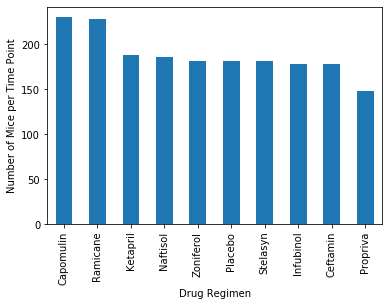

In [7]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

counter = full_mouse_clean['Drug Regimen'].value_counts()

counter.plot(kind='bar')

#clean chart

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice per Time Point')


plt.show


<function matplotlib.pyplot.show(*args, **kw)>

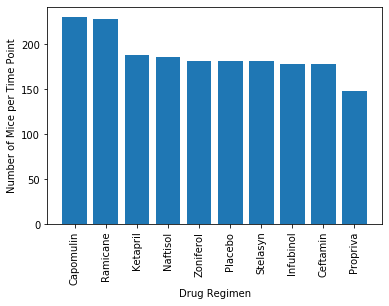

In [8]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

counter = full_mouse_clean['Drug Regimen'].value_counts()

plt.bar(counter.index.values, counter.values)

plt.xlabel('Drug Regimen')
plt.xticks(rotation=90)
plt.ylabel('Number of Mice per Time Point')

plt.show

## Pie Plots

<function matplotlib.pyplot.show(*args, **kw)>

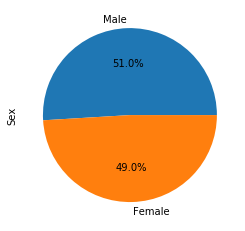

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

counter = full_mouse_clean['Sex'].value_counts()

counter.plot(kind='pie', autopct='%1.1f%%')


plt.show



<function matplotlib.pyplot.show(*args, **kw)>

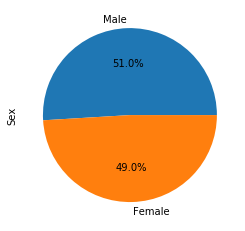

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

counter = full_mouse_clean['Sex'].value_counts()

plt.pie(counter.values, labels=counter.index.values, autopct='%1.1f%%')

#add graph label

plt.ylabel('Sex')

plt.show

## Quartiles, Outliers and Boxplots

In [58]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

# thank you Carrie for the help with the code for finding drug effectivness!
#drugs taken from smallest tumor volume mean

#get only final tumor volumes for timepoints greater than or equal to 45
mmerge_df=full_mouse_clean.loc[full_mouse_clean['Timepoint']>=45]

#separate them out by drug regimen

cap_df = mmerge_df.loc[mmerge_df['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
ram_df = mmerge_df.loc[mmerge_df['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
pro_df = mmerge_df.loc[mmerge_df['Drug Regimen'] == 'Propriva']['Tumor Volume (mm3)']
ceft_df = mmerge_df.loc[mmerge_df['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']

#wait, can't i just use .isin like before to find dups and instead find these 4 drugs???
"""best_drugs = mmerge_df.loc[mmerge_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Propriva', 'Ceftamin'])]
best_drugs_data = best_drugs[['Drug Regimen', 'Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']]
best_drugs_data"""

mmerge_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1763,n364,45,31.095335,1,Ramicane,Male,4,17
1764,b128,45,38.982878,2,Capomulin,Female,9,22
1765,l661,45,59.851956,3,Ceftamin,Male,18,26
1766,y865,45,64.729837,3,Ceftamin,Male,23,26
1767,y769,45,68.594745,4,Ceftamin,Female,6,27
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


<function matplotlib.pyplot.show(*args, **kw)>

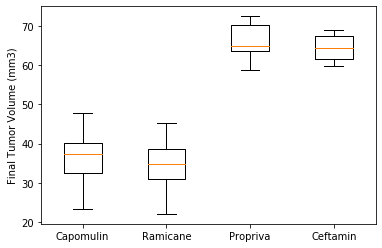

In [35]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

drug_list = ['Capomulin', 'Ramicane', 'Propriva', 'Ceftamin']

green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot([cap_df,ram_df,pro_df,ceft_df],labels=drug_list, flierprops=green_diamond)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show
# https://matplotlib.org/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py

## Line and Scatter Plots

<function matplotlib.pyplot.show(*args, **kw)>

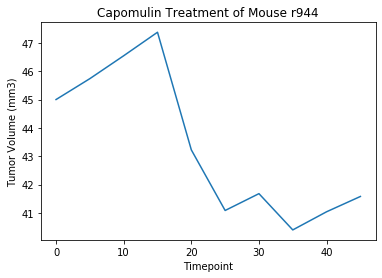

In [40]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_data = full_mouse_clean.loc[full_mouse_clean['Drug Regimen'] == 'Capomulin']

#check data
#capomulin_data

cap_mouse_data = capomulin_data.loc[capomulin_data['Mouse ID'] == 'r944']

#check data
#cap_mouse_data

plt.plot(cap_mouse_data['Timepoint'], cap_mouse_data['Tumor Volume (mm3)'])

#add details
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint')
plt.title('Capomulin Treatment of Mouse r944')

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

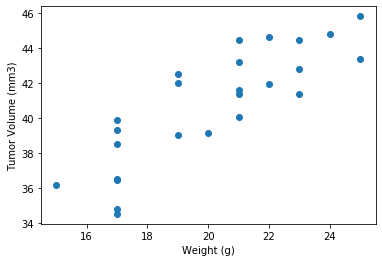

In [44]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin_data = full_mouse_clean.loc[full_mouse_clean['Drug Regimen'] == 'Capomulin']

#check data
#capomulin_data

cap_mouse_avg = capomulin_data.groupby(['Mouse ID']).mean()

#check data
#cap_mouse_data

plt.scatter(cap_mouse_avg['Weight (g)'], cap_mouse_avg['Tumor Volume (mm3)'])

#add details
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Weight (g)')

plt.show


## Correlation and Regression

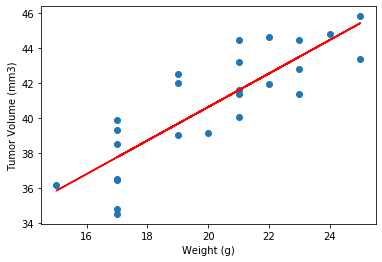

In [56]:
# Calculate the correlation coefficient and linear regression model

mouse_weight_slope, mouse_weight_int, mouse_weight_r, mouse_weight_p, mouse_weight_std_err = st.linregress(cap_mouse_avg['Weight (g)'], cap_mouse_avg['Tumor Volume (mm3)'])

mouse_weight = cap_mouse_avg['Weight (g)']

mouse_weight_fit = mouse_weight_slope * mouse_weight + mouse_weight_int



# for mouse weight and average tumor volume for the Capomulin regimen

plt.scatter(cap_mouse_avg['Weight (g)'], cap_mouse_avg['Tumor Volume (mm3)'])
plt.plot(mouse_weight,mouse_weight_fit,color='red')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.show()

In [57]:
mouse_weight_slope

0.9544396890241045